# Logistic Regression 

In [1]:
#Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
X = pd.read_csv("Logistic_X_Train.csv")
Y = pd.read_csv("Logistic_Y_Train.csv")

In [3]:
X.shape

(3000, 3)

In [4]:
X.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [5]:
Y.head()

,label
0,1
1,1
2,1
3,0
4,0


# Logistic Model

In [7]:
import numpy as np
def sigmoid (z):
    return 1/(1+np.exp(-z))

In [8]:
def hx (w,X):
    z = np.array(w[0]+w[1]*np.array(X[:,0])+w[2]*np.array(X[:,1]),w[3]*np.array(X[:,2]))
    return sigmoid(z)

# Cost - Binary Cross Entrophy 

In [9]:
def cost(w,X,Y):
    y_pred = hx(w,X)
    return -1 * sum(Y*np.log(y_pred)+(1-Y)*np.log(1-y_pred))

# Gradient Descent

In [10]:
def grad(w, X, Y):
    y_pred = hx(w,X)
    g = [0]*3
    g[0] = -1 * sum(Y*(1-y_pred) - (1-Y)*y_pred)
    g[1] = -1 * sum(Y*(1-y_pred)*X[:,0] - (1-Y)*y_pred*X[:,0])
    g[2] = -1 * sum(Y*(1-y_pred)*X[:,1] - (1-Y)*y_pred*X[:,1])
    g[3] = -1 * sum(Y*(1-y_pred)*X[:,2] - (1-Y)*y_pred*X[:,2])
    return g

In [11]:
def descent(w_new, w_prev, lr):
    print(w_prev)
    print(cost(w_prev, X, Y))
    j=0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr*grad(w_prev, X, Y)[0]
        w1 = w_prev[1] - lr*grad(w_prev, X, Y)[1]
        w2 = w_prev[2] - lr*grad(w_prev, X, Y)[2]
        w2 = w_prev[3] - lr*grad(w_prev, X, Y)[3]
        w_new = [w0, w1, w2,w3]
        print(w_new)
        print(cost(w_new, X, Y))
        if (w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 + (w_new[2]-w_prev[2])**2 +(w_new[3]-w_prev[3])**2 <pow(10,-6):
            return w_new
        
        if j>100: 
            return w_new
        j+=1

In [12]:
w=[1,1,1,1]

In [13]:
descent(w,w,0.0099)

[1, 1, 1, 1]


TypeError: '(slice(None, None, None), 0)' is an invalid key

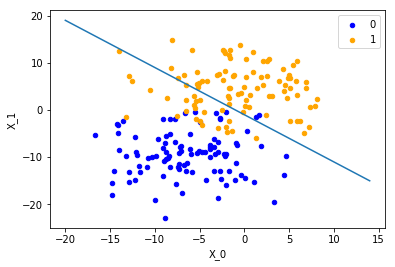

In [27]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return (-w[0]-w[1]*x)/w[2]

from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(my_formula, range(-20,15))
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()